##### Name: Ananya Godse SAP ID: 60009220161

#### Importing the basic libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV

#### Importing the datasets

In [2]:
plant1 = pd.read_csv("plant1_merged.csv")
plant1

,Unnamed: 0,DATE_TIME,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.184316,22.857507,0.0
1,1,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,25.084589,22.761668,0.0
2,2,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,24.935753,22.592306,0.0
3,3,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,24.846130,22.360852,0.0
4,4,2020-05-15 00:00:00,1BY6WEcLGh8j5v7,0.0,0.0,0.000,6259559.0,24.621525,22.165423,0.0
...,...,...,...,...,...,...,...,...,...,...
134125,134125,2020-06-17 23:45:00,uHbuxQJl8lW7ozc,0.0,0.0,5967.000,7287002.0,NaN,NaN,NaN
134126,134126,2020-06-17 23:45:00,wCURE6d3bPkepu2,0.0,0.0,5147.625,7028601.0,NaN,NaN,NaN
134127,134127,2020-06-17 23:45:00,z9Y9gH1T5YWrNuG,0.0,0.0,5819.000,7251204.0,NaN,NaN,NaN
134128,134128,2020-06-17 23:45:00,zBIq5rxdHJRwDNY,0.0,0.0,5817.000,6583369.0,NaN,NaN,NaN


In [3]:
plant2 = pd.read_csv("plant2_merged.csv")
plant2

,Unnamed: 0,DATE_TIME,INVERTER_ID,DC_POWER,AC_POWER,DAILY_YIELD,TOTAL_YIELD,AMBIENT_TEMPERATURE,MODULE_TEMPERATURE,IRRADIATION
0,0,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,27.004764,25.060789,0.0
1,1,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.880811,24.421869,0.0
2,2,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.682055,24.427290,0.0
3,3,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.500589,24.420678,0.0
4,4,2020-05-15 00:00:00,4UPUqMRk7TRMgml,0.0,0.0,9425.0,2429011.0,26.596148,25.088210,0.0
...,...,...,...,...,...,...,...,...,...,...
134651,134651,2020-06-17 11:30:00,q49J1IKaHRwDQnt,0.0,0.0,4157.0,520758.0,NaN,NaN,NaN
134652,134652,2020-06-17 11:30:00,rrq4fwE8jgrTyWY,0.0,0.0,3931.0,121131356.0,NaN,NaN,NaN
134653,134653,2020-06-17 11:30:00,vOuJvMaM2sgwLmb,0.0,0.0,4322.0,2427691.0,NaN,NaN,NaN
134654,134654,2020-06-17 11:30:00,xMbIugepa2P7lBB,0.0,0.0,4218.0,106896394.0,NaN,NaN,NaN


In [4]:
plant1.drop(["Unnamed: 0", "INVERTER_ID"], axis=1, inplace=True)
plant2.drop(["Unnamed: 0", "INVERTER_ID"], axis=1, inplace=True)

In [5]:
plant1.dtypes

DATE_TIME               object
DC_POWER               float64
AC_POWER               float64
DAILY_YIELD            float64
TOTAL_YIELD            float64
AMBIENT_TEMPERATURE    float64
MODULE_TEMPERATURE     float64
IRRADIATION            float64
dtype: object

In [6]:
plant1["DATE_TIME"] = pd.to_datetime(plant1["DATE_TIME"], format="%Y-%m-%d %H:%M:%S")
plant2["DATE_TIME"] = pd.to_datetime(plant2["DATE_TIME"], format="%Y-%m-%d %H:%M:%S")

In [7]:
plant1.dtypes

DATE_TIME              datetime64[ns]
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

In [8]:
plant2.dtypes

DATE_TIME              datetime64[ns]
DC_POWER                      float64
AC_POWER                      float64
DAILY_YIELD                   float64
TOTAL_YIELD                   float64
AMBIENT_TEMPERATURE           float64
MODULE_TEMPERATURE            float64
IRRADIATION                   float64
dtype: object

#### Some Assumptions:
We're going to keep DAILY_YIELD as our target variable.
So in a real life scenario, we'd just have the weather sensor data to predict the daily yield of a power plant and so we'll move forward with just that. 

#### Train Test Split

In [9]:
reduced_plant1 = plant1[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "DAILY_YIELD"]]

In [10]:
reduced_plant2 = plant2[["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION", "DAILY_YIELD"]]

In [11]:
reduced_plant1.isnull().sum()

AMBIENT_TEMPERATURE    65594
MODULE_TEMPERATURE     65594
IRRADIATION            65594
DAILY_YIELD                0
dtype: int64

In [12]:
reduced_plant1.fillna(value=0, inplace=True)
reduced_plant2.fillna(value=0, inplace=True)

C:\Users\Ananya\AppData\Local\Temp\ipykernel_3256\3200288954.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_plant1.fillna(value=0, inplace=True)
C:\Users\Ananya\AppData\Local\Temp\ipykernel_3256\3200288954.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  reduced_plant2.fillna(value=0, inplace=True)


In [13]:
train_features = ["AMBIENT_TEMPERATURE", "MODULE_TEMPERATURE", "IRRADIATION"]
X_p1 = reduced_plant1[train_features]
y_p1 = reduced_plant1["DAILY_YIELD"]

In [14]:
X_p2 = reduced_plant2[train_features]
y_p2 = reduced_plant2["DAILY_YIELD"]

In [15]:
X_p1_train, X_p1_test, y_p1_train, y_p1_test = train_test_split(X_p1, y_p1, test_size=0.2, random_state=42)

In [16]:
X_p2_train, X_p2_test, y_p2_train, y_p2_test = train_test_split(X_p2, y_p2, test_size=0.2, random_state=42)

#### LINEAR REGRESSION

In [17]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [18]:
linreg = LinearRegression()
linreg.fit(X_p1_train, y_p1_train)
pred = linreg.predict(X_p1_test)

In [19]:
mean_squared_error(y_p1_test, pred)

7887607.970225091

In [20]:
linreg2 = LinearRegression() # PLANT 2
linreg2.fit(X_p2_train, y_p2_train)
pred2 = linreg2.predict(X_p2_test)

In [21]:
mean_squared_error(y_p2_test, pred2)

9666845.977933416

Default Linear Regression gives a pretty high MSE value which is not good. Now, we know from EDA that Module Temperature, Ambient Temperature and Irradiation are all very highly correlated. So let's try and do Linear Regression with only Irradiation as the other two are a consequence of Irradiation.

In [22]:
X_p1_rev = reduced_plant1["IRRADIATION"]

In [23]:
X_p1_train_rev, X_p1_test_rev, y_p1_train, y_p1_test = train_test_split(X_p1_rev, y_p1, test_size=0.2, random_state=42)

In [24]:
X_p1_train_rev = X_p1_train_rev.to_numpy()
X_p1_test_rev = X_p1_test_rev.to_numpy()
X_p1_train_rev = X_p1_train_rev.reshape(-1, 1)
X_p1_test_rev = X_p1_test_rev.reshape(-1, 1)

linreg = LinearRegression()
linreg.fit(X_p1_train_rev, y_p1_train)
pred = linreg.predict(X_p1_test_rev)

In [25]:
mean_squared_error(y_p1_test, pred)

8109974.187599193

Okay the mse is still too high.

##### using GridSearchCV to find the best parameters

In [26]:
model = LinearRegression()

param_grid = {
    'fit_intercept': [True, False],
    'copy_X': [True, False]
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error')

grid_search.fit(X_p1_train_rev, y_p1_train)

print("Best hyperparameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

y_pred = best_model.predict(X_p1_test_rev)
mse = mean_squared_error(y_p1_test, y_pred)
print("Mean Squared Error:", mse)

Best hyperparameters: {'copy_X': True, 'fit_intercept': True}
Mean Squared Error: 8109974.187599193


Even using GridSearchCV the mse is way too big.

#### DECISION TREE REGRESSOR

In [27]:
from sklearn.tree import DecisionTreeRegressor
decreg = DecisionTreeRegressor(random_state = 42)  
decreg.fit(X_p1_train, y_p1_train) # using all weather sensor features
pred = decreg.predict(X_p1_test)

In [28]:
mean_squared_error(y_p1_test, pred)

5189993.872284841

In [29]:
decreg = DecisionTreeRegressor(random_state = 42)  
decreg.fit(X_p1_train_rev, y_p1_train) # using only irradiation
pred = decreg.predict(X_p1_test_rev)

In [30]:
mean_squared_error(y_p1_test, pred)

6589861.20479132

In [31]:
tree_reg = DecisionTreeRegressor()

param_grid = {
    'max_depth': [None, 10, 20, 30], 
    'min_samples_split': [2, 5, 10], 
    'min_samples_leaf': [1, 2, 4]     
}

grid_search = GridSearchCV(tree_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_p1_train, y_p1_train)

print("Best parameters:", grid_search.best_params_)

best_tree_reg = grid_search.best_estimator_

y_pred = best_tree_reg.predict(X_p1_test) 
mse = mean_squared_error(y_p1_test, pred)
print("Mean squared error on test set:", mse)

Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2}
Mean squared error on test set: 6589861.20479132


Decision Tree Regressor is a horrible model for this.

#### LASSO REGRESSION

In [32]:
from sklearn.linear_model import Lasso
lasso = Lasso(alpha=0.1)
lasso.fit(X_p1_train, y_p1_train)
pred = lasso.predict(X_p1_test)

C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 5.416e+10, tolerance: 8.788e+07
  model = cd_fast.enet_coordinate_descent(


In [33]:
mean_squared_error(y_p1_test, pred)

7887634.380124176

In [34]:
lasso_reg = Lasso()

param_grid = {
    'alpha': [0.001, 0.01, 0.1, 1, 10]  
}

grid_search = GridSearchCV(lasso_reg, param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1)

grid_search.fit(X_p1_train, y_p1_train)

print("Best parameters:", grid_search.best_params_)

best_lasso_reg = grid_search.best_estimator_

y_pred = best_lasso_reg.predict(X_p1_test) 
mse = mean_squared_error(y_p1_test, y_pred)
print("Mean squared error on test set:", mse)

Fitting 5 folds for each of 5 candidates, totalling 25 fits


C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.257e+11, tolerance: 7.028e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.248e+11, tolerance: 7.006e+07
  model = cd_fast.enet_coordinate_descent(
C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.258e+11, toler

Best parameters: {'alpha': 0.001}
Mean squared error on test set: 7887607.837941845


C:\Users\Ananya\anaconda3\Lib\site-packages\sklearn\linear_model\_coordinate_descent.py:628: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.068e+11, tolerance: 8.788e+07
  model = cd_fast.enet_coordinate_descent(


#### RIDGE REGRESSION

In [35]:
from sklearn.linear_model import Ridge
ridge = Ridge(alpha=1.0)
ridge.fit(X_p1_train, y_p1_train)
pred = ridge.predict(X_p1_test)

In [36]:
mean_squared_error(y_p1_test, pred)

7887612.985658665

Both Lasso & Ridge Regression don't work out.

#### New Training & Testing data (with DATE_TIME)

In [37]:
t_reduced_plant1 = plant1[["DATE_TIME","DAILY_YIELD"]]
t_reduced_plant2 = plant2[["DATE_TIME","DAILY_YIELD"]]

In [38]:
t_reduced_plant1.set_index("DATE_TIME", inplace=True)
t_reduced_plant1

,DAILY_YIELD
DATE_TIME,
2020-05-15 00:00:00,0.000
2020-05-15 00:00:00,0.000
2020-05-15 00:00:00,0.000
2020-05-15 00:00:00,0.000
2020-05-15 00:00:00,0.000
...,...
2020-06-17 23:45:00,5967.000
2020-06-17 23:45:00,5147.625
2020-06-17 23:45:00,5819.000


In [39]:
t_reduced_plant2.set_index("DATE_TIME", inplace=True)
t_reduced_plant2

,DAILY_YIELD
DATE_TIME,
2020-05-15 00:00:00,9425.0
2020-05-15 00:00:00,9425.0
2020-05-15 00:00:00,9425.0
2020-05-15 00:00:00,9425.0
2020-05-15 00:00:00,9425.0
...,...
2020-06-17 11:30:00,4157.0
2020-06-17 11:30:00,3931.0
2020-06-17 11:30:00,4322.0


In [40]:
split_date = '2020-06-06'
plant1_train = t_reduced_plant1.loc[:split_date]
plant1_test = t_reduced_plant1.loc[split_date:]

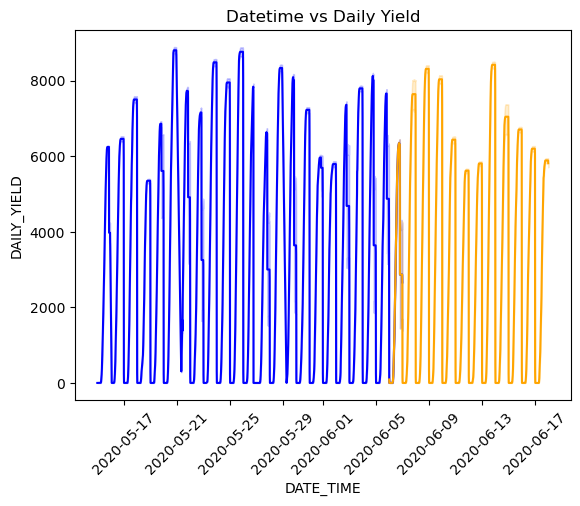

In [41]:
sns.lineplot(data=plant1_train, x=plant1_train.index, y=plant1_train["DAILY_YIELD"], c="blue")
sns.lineplot(data=plant1_test, x=plant1_test.index, y=plant1_test["DAILY_YIELD"], c="orange")
plt.title("Datetime vs Daily Yield")
plt.xticks(rotation=45)
plt.show()

In [42]:
plant2_train = t_reduced_plant2.loc[:split_date]
plant2_test = t_reduced_plant2.loc[split_date:]

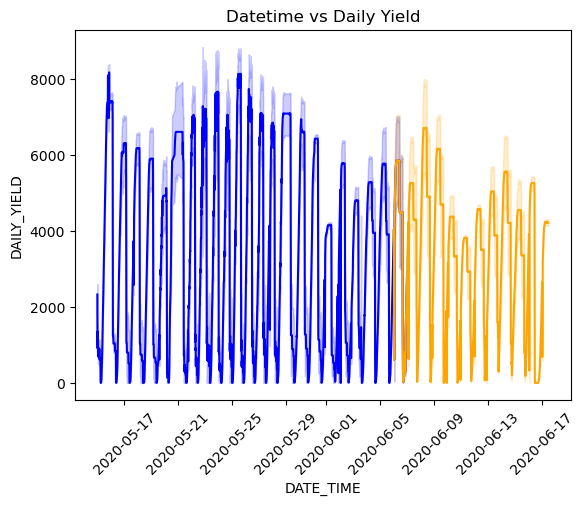

In [43]:
sns.lineplot(data=plant2_train, x=plant2_train.index, y=plant2_train["DAILY_YIELD"], c="blue")
sns.lineplot(data=plant2_test, x=plant2_test.index, y=plant2_test["DAILY_YIELD"], c="orange")
plt.title("Datetime vs Daily Yield")
plt.xticks(rotation=45)
plt.show()

In [44]:
def create_features(df):
    df = df.copy()
    df['hour'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek
    df['month'] = df.index.month
    df['year'] = df.index.year
    df['week_of_year'] = df.index.isocalendar().week
    return df

t_reduced_plant1 = create_features(t_reduced_plant1)
plant1_train = create_features(plant1_train)
plant1_test = create_features(plant1_test)

t_reduced_plant2 = create_features(t_reduced_plant2)
plant2_train = create_features(plant2_train)
plant2_test = create_features(plant2_test)

In [45]:
X_p1_train = plant1_train.iloc[:, 1:]
y_p1_train = plant1_train.iloc[:, 0]

X_p1_test = plant1_test.iloc[:, 1:]
y_p1_test = plant1_test.iloc[:, 0]

#### XG BOOST REGRESSOR:

In [46]:
import xgboost as xgb

##### PLANT 1:

In [47]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_p1_train, y_p1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [48]:
predictions = reg.predict(X_p1_test)
predictions

array([  47.04413,   47.04413,   47.04413, ..., 7617.5845 , 7617.5845 ,
       7617.5845 ], dtype=float32)

In [49]:
mse = mean_squared_error(y_p1_test, predictions)
print(f"MSE = {mse:.2f}")

MSE = 2536624.12


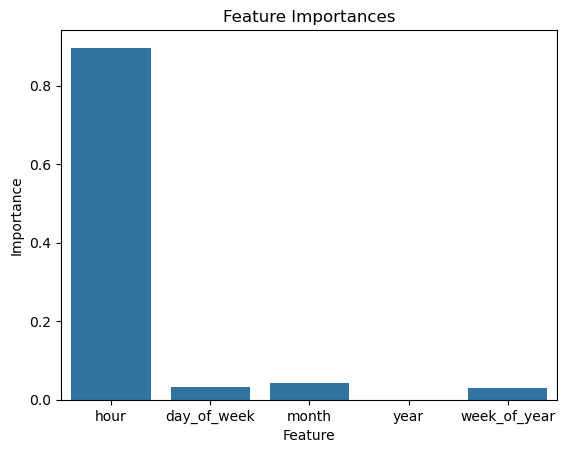

In [50]:
sns.barplot(x=reg.feature_names_in_, y=reg.feature_importances_).set(xlabel='Feature', ylabel='Importance', title='Feature Importances')
plt.show()

In [51]:
X_p1_train = plant1_train.iloc[:, 1]
y_p1_train = plant1_train.iloc[:, 0]

X_p1_test = plant1_test.iloc[:, 1]
y_p1_test = plant1_test.iloc[:, 0]

In [52]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_p1_train, y_p1_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [53]:
predictions = reg.predict(X_p1_test)
predictions

array([  25.496717,   25.496717,   25.496717, ..., 4983.6963  ,
       4983.6963  , 4983.6963  ], dtype=float32)

In [54]:
rmse = np.sqrt(mean_squared_error(y_p1_test, predictions))
print(f"RMSE = {rmse:.2f}")

RMSE = 1128.25


In [55]:
model = xgb.XGBRegressor()
param_grid = {
    'n_estimators': [100, 500, 1000],
    'learning_rate': [0.01, 0.05, 0.1],
}

grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=2)
grid_search.fit(X_p1_train, y_p1_train)

print("Best parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_

test_predictions = best_model.predict(X_p1_test)
mse = np.mean((test_predictions - y_p1_test) ** 2)
print("Mean Squared Error on test set:", mse)

Fitting 5 folds for each of 9 candidates, totalling 45 fits
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=100; total time=   0.2s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.3s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.3s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.1s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.2s
[CV] END ...............learning_rate=0.01, n_estimators=500; total time=   1.2s
[CV] END ..............learning_rate=0.01, n_estimators=1000; total time=   2.4s
[CV] END ..............learning_rate=0.01, n_esti

The best model for plant 1 is XGBoostRegressor with only the feature hour, n_estimators=1000 and learning rate=0.01

##### PLANT 2:

In [56]:
plant2_train

,DAILY_YIELD,hour,day_of_week,month,year,week_of_year
DATE_TIME,,,,,,
2020-05-15 00:00:00,9425.000000,0,4,5,2020,20
2020-05-15 00:00:00,9425.000000,0,4,5,2020,20
2020-05-15 00:00:00,9425.000000,0,4,5,2020,20
2020-05-15 00:00:00,9425.000000,0,4,5,2020,20
2020-05-15 00:00:00,9425.000000,0,4,5,2020,20
...,...,...,...,...,...,...
2020-06-06 23:45:00,1078.000000,23,5,6,2020,23
2020-06-06 23:45:00,4292.428571,23,5,6,2020,23
2020-06-06 23:45:00,4162.533333,23,5,6,2020,23


In [57]:
X_p2_train = plant2_train.iloc[:, 1:]
y_p2_train = plant2_train.iloc[:, 0]

X_p2_test = plant2_test.iloc[:, 1:]
y_p2_test = plant2_test.iloc[:, 0]

In [58]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_p2_train, y_p2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [59]:
predictions = reg.predict(X_p2_test)
predictions

array([3644.4348, 3644.4348, 3644.4348, ...,  975.2371,  975.2371,
        975.2371], dtype=float32)

In [60]:
rmse = np.sqrt(mean_squared_error(y_p2_test, predictions))
print(f"RMSE = {rmse:.2f}")

RMSE = 2466.05


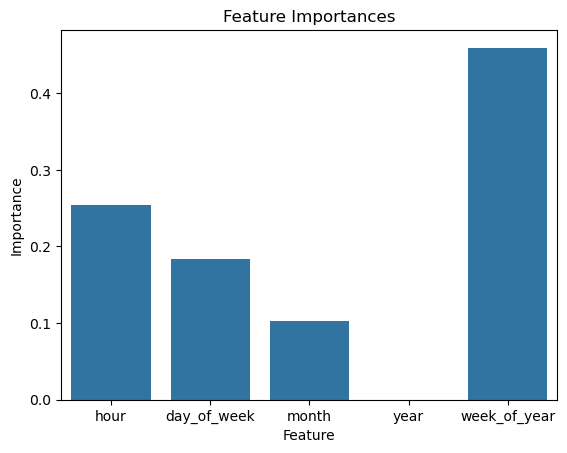

In [61]:
sns.barplot(x=reg.feature_names_in_, y=reg.feature_importances_).set(xlabel='Feature', ylabel='Importance', title='Feature Importances')
plt.show()

In [62]:
X_p2_train = plant2_train.drop(['year', 'month'], axis=1)
y_p2_train = plant2_train.iloc[:, 0]

X_p2_test = plant2_test.drop(['year', 'month'], axis=1)
y_p2_test = plant2_test.iloc[:, 0]

In [63]:
reg = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg.fit(X_p2_train, y_p2_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [64]:
predictions = reg.predict(X_p2_test)
predictions

array([1067.047 , 5523.4956, 5374.6084, ..., 4315.8247, 4209.1377,
       4315.8247], dtype=float32)

In [65]:
rmse = np.sqrt(mean_squared_error(y_p2_test, predictions))
print(f"RMSE = {rmse:.2f}")

RMSE = 15.60


The best model for Plant 2 is XGBoostRegressor with the features: hour, day_of_week, week_of_year, n_Estimators=1000, learning_rate=0.01

#### FINAL MODEL:

##### PLANT 1:

In [66]:
X_p1_train_final = plant1_train.iloc[:, 1] # only hour data
y_p1_train_final = plant1_train.iloc[:, 0]

X_p1_test_final = plant1_test.iloc[:, 1]
y_p1_test_final = plant1_test.iloc[:, 0]

In [67]:
reg_final_p1 = xgb.XGBRegressor(n_estimators=1000, learning_rate=0.01)
reg_final_p1.fit(X_p1_train_final, y_p1_train_final)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=1000, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [69]:
predictions_final_p1 = reg_final_p1.predict(X_p1_test_final)
predictions_final_p1

array([  25.496717,   25.496717,   25.496717, ..., 4983.6963  ,
       4983.6963  , 4983.6963  ], dtype=float32)

In [70]:
rmse_final_p1 = np.sqrt(mean_squared_error(y_p1_test_final, predictions_final_p1))
print(f"RMSE = {rmse_final_p1:.2f}")

RMSE = 1128.25


##### PLANT 2:

In [71]:
X_p2_train_final = plant2_train.drop(['year', 'month'], axis=1) # using week_of_year, day_of_week, hour
y_p2_train_final = plant2_train.iloc[:, 0]

X_p2_test_final = plant2_test.drop(['year', 'month'], axis=1)
y_p2_test_final = plant2_test.iloc[:, 0]

In [72]:
reg_final_p2 = xgb.XGBRegressor(n_estimators=100, learning_rate=0.01)
reg_final_p2.fit(X_p2_train_final, y_p2_train_final)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [73]:
predictions_final_p2 = reg.predict(X_p2_test_final)
predictions_final_p2

array([1067.047 , 5523.4956, 5374.6084, ..., 4315.8247, 4209.1377,
       4315.8247], dtype=float32)

In [74]:
rmse_final_p2 = np.sqrt(mean_squared_error(y_p2_test_final, predictions_final_p2))
print(f"RMSE = {rmse_final_p2:.2f}")

RMSE = 15.60


#### Exporting the final train, test sets:

In [ ]:
X_p1_train_final.to_csv('X_plant1_train.csv')
X_p1_test_final.to_csv('X_plant1_test.csv')

y_p1_train_final.to_csv('y_plant1_train.csv')
y_p1_test_final.to_csv('y_plant1_test.csv')

X_p2_train_final.to_csv('X_plant2_train.csv')
X_p2_test_final.to_csv('X_plant2_test.csv')

y_p2_train_final.to_csv('y_plant2_train.csv')
y_p2_test_final.to_csv('y_plant2_test.csv')